In [5]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/Join_data6.xlsx", index_col = 0)    
# all.drop([0], axis=0, inplace=True)

# 컬럼 추출
all2 = all[[ '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
        '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

        
# all2 = all2.set_index("DateTime")


all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
            "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"

# DateTime을 인덱스로 바꿔주기
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,0.0240,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,0.0240,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,0.0250,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,0.0240,1128.8
2012-08-09,1125.5,0.05,0.06,0.06,0.05,0.04,0.09,0.040,0.04,0.04,0.04,0.05,0.06,0.05,0.05,0.04,0.04,2.25,0.0235,1128.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,-0.11,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,-0.0060,1313.0
2022-07-26,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,-0.02,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,-0.0070,1313.7
2022-07-27,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,-0.01,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.0055,1307.6


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

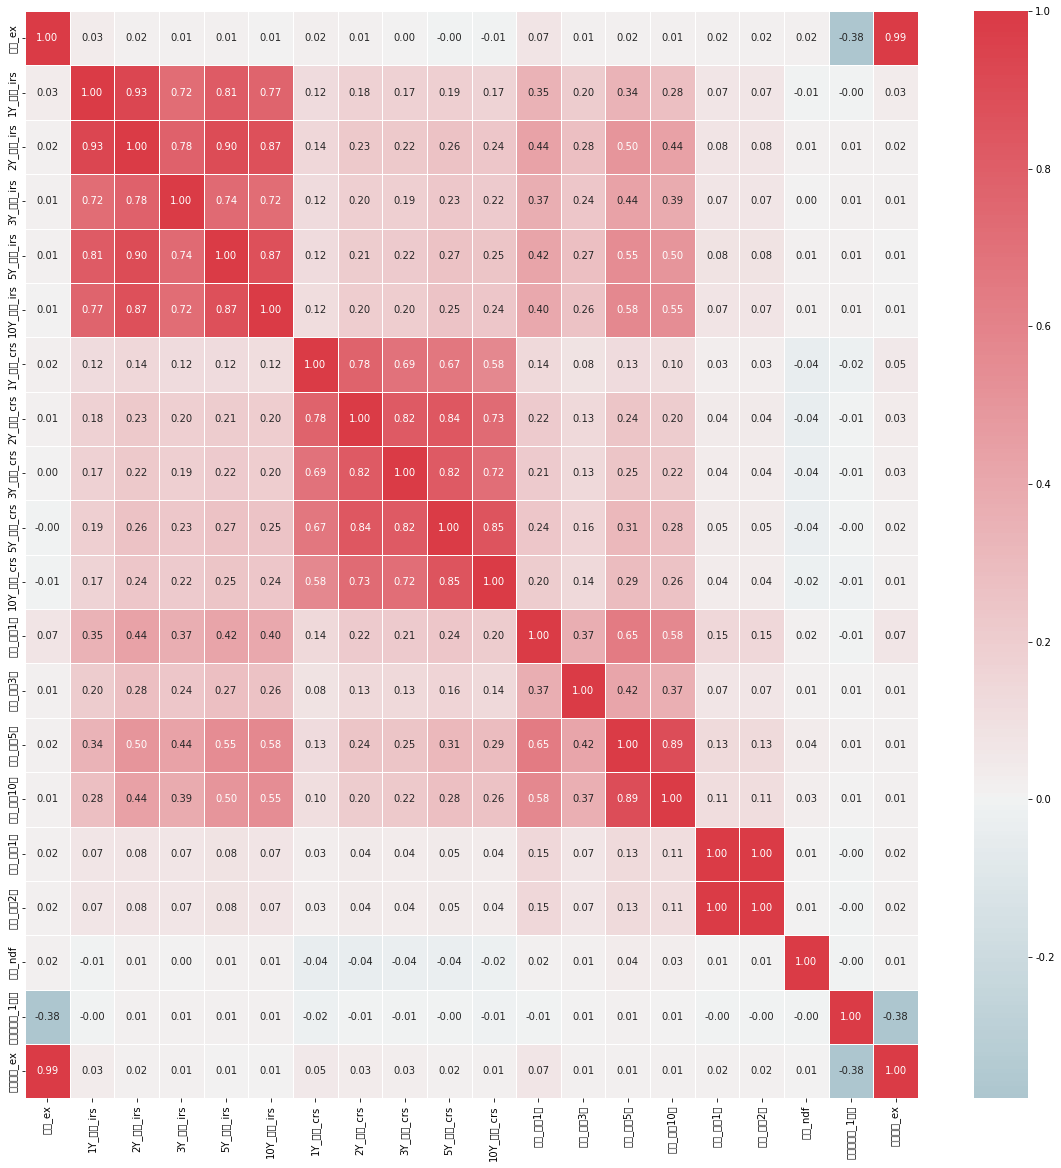

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [7]:
from sklearn.preprocessing import StandardScaler

x = df[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
          '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
          "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
           "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"
y = df[["종가_ex"]]
x.feature = x.columns 

# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정
x_scaled

,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-03,-0.848159,-0.731938,-0.562641,-0.628439,-0.403644,-0.205379,-0.364044,-0.462614,-1.872301,-3.114970,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.217667,0.184967,1.820638,-0.056282
2012-08-06,0.559997,0.481950,0.370979,0.415773,0.202253,-0.003127,-0.602217,-0.690720,-0.939235,-0.832887,0.563092,0.159979,0.000440,-0.000209,0.107313,0.107313,-0.449739,1.820638,-0.000487
2012-08-07,0.278366,-0.003605,-0.002469,0.206931,0.404219,0.401378,0.350478,-0.006403,-1.639035,-1.662735,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.109340,0.020414,1.911215,-0.104877
2012-08-08,0.278366,0.481950,0.370979,0.415773,0.606184,0.199126,-0.006783,-0.006403,-0.472702,-0.832887,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.109340,0.055675,1.820638,-0.108476
2012-08-09,1.404890,1.453061,1.117875,1.042301,0.808150,1.817145,0.945913,0.906019,0.926898,0.826810,2.825583,0.966767,1.351270,1.284529,0.432293,0.432293,0.102691,1.775350,-0.117475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129790,-1.945827,-1.309537,-1.881494,-2.221333,-1.621146,-2.150347,-1.603142,-2.572101,-2.285122,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.109340,0.154407,-0.896666,3.206786
2022-07-26,-0.284897,-0.489161,-0.562641,-0.628439,-0.605609,0.199126,-0.721304,-0.690720,-0.472702,-0.417963,0.563092,-0.485451,-0.539892,-0.771052,0.107313,0.107313,0.050974,-0.987243,3.219385
2022-07-27,-0.284897,-1.217494,-1.122813,-1.254966,-1.211506,0.199126,-0.244957,-0.234509,-0.239435,-0.210501,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,0.215640,-0.026602,-0.851378,3.109596


<AxesSubplot:>

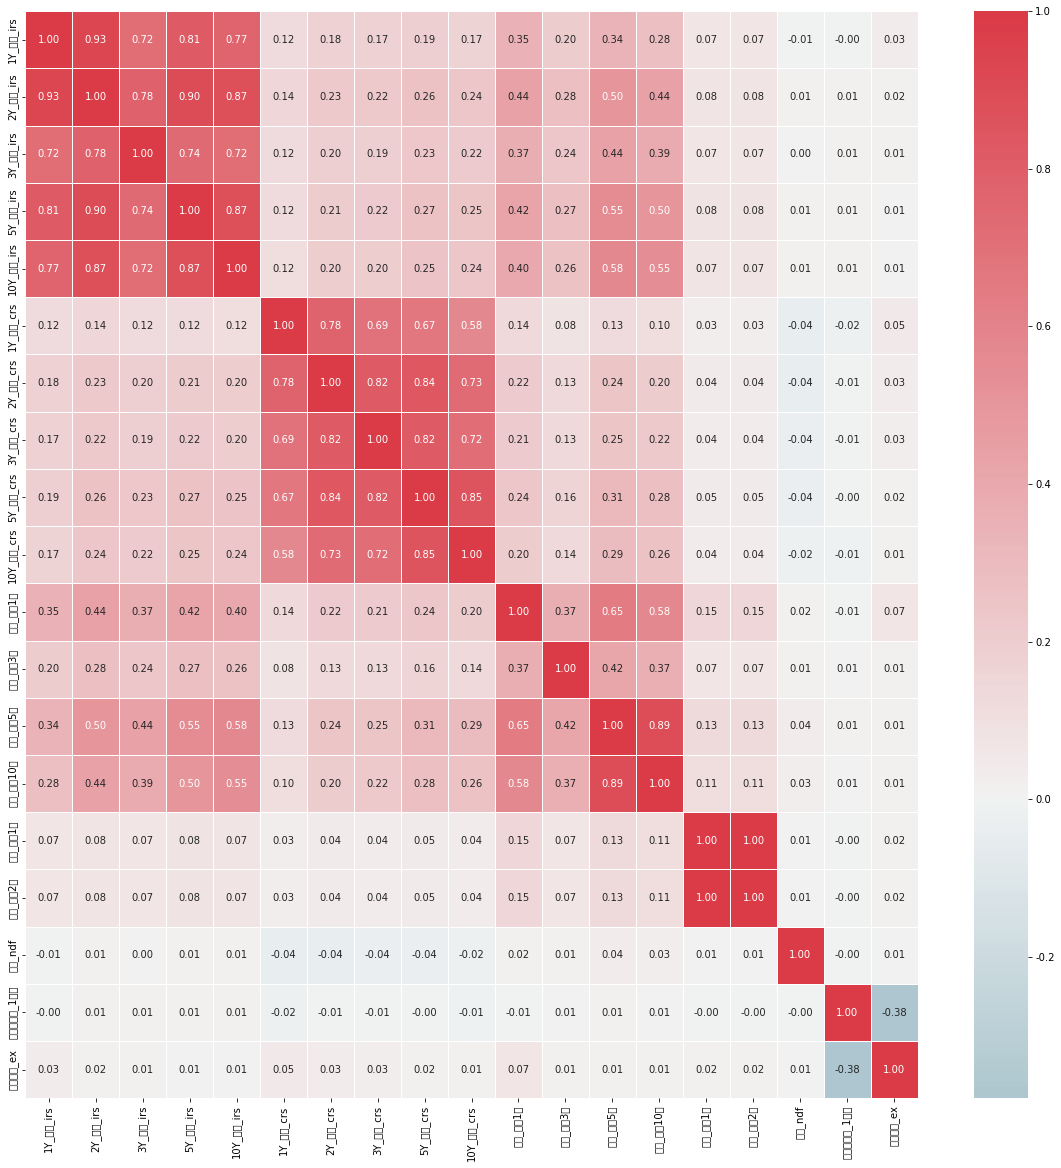

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.984542   1Y_대비_irs
1    19.531598   2Y_대비_irs
2     2.661664   3Y_대비_irs
3     6.465950   5Y_대비_irs
4     5.870891  10Y_대비_irs
5     2.653384   1Y_대비_crs
6     5.263432   2Y_대비_crs
7     3.829427   3Y_대비_crs
8     6.696994   5Y_대비_crs
9     3.716680  10Y_대비_crs
10    1.895579     대비_국고1년
11    1.252806     대비_국고3년
12    6.217976     대비_국고5년
13    5.051577    대비_국고10년
14         inf     대비_통안1년
15         inf     대비_통안2년
16    1.007480      대비_ndf
17    1.169325   스왑포인트_1월물
18    1.182087     전일종가_ex


In [10]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.420e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:48:30   Log-Likelihood:                -7638.2
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2439   BIC:                         1.542e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.1765      0.346      0.510      0.610      -0.502       0.855
2Y_대비_irs      0.5209      0.484      1.076      0.282      -0.429       1.471
3Y_대비_irs      0.0111      0.179      0.062      0.951      -0.339       0.362
5Y_대비_irs     -0.2662      0.279     -0.955      0.339      -0.813       0.280
10Y_대비_irs    -0.5170      0.266     -1.947      0.052      -1.038       0.004
1Y_대비_crs     -1.0740      0.178     -6.017      0.000      -1.424      -0.724
2Y_대비_crs     -0.2506      0.251     -0.997      0.319      -0.744       0.242
3Y_대비_crs     -0.4336      0.214     -2.022      0.043      -0.854      -0.013
5Y_대비_crs     -0.1678      0.284     -0.592      0.554      -0.724       0.388
10Y_대비_crs     0.1737      0.211      0.822      0.411      -0.241       0.588
대비_국고1년        0.1180      0.151      0.782      0.434      -0.178       0.414
대비_국고3년       -0.2693      0.123     -2.196      0.028      -0.510      -0.029
대비_국고5년        1.0269      0.273      3.758      0.000       0.491       1.563
대비_국고10년      -0.2589      0.246     -1.051      0.293      -0.742       0.224
대비_통안1년       -0.0021      0.055     -0.037      0.970      -0.111       0.107
대비_통안2년       -0.0021      0.055     -0.037      0.970      -0.111       0.107
대비_ndf         0.5270      0.110      4.791      0.000       0.311       0.743
스왑포인트_1월물     -0.1463      0.118     -1.235      0.217      -0.379       0.086
전일종가_ex       55.3593      0.119    464.677      0.000      55.126      55.593
==============================================================================
Omnibus:                       39.269   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.078
Skew:                          -0.024   Prob(JB):                     8.21e-17
Kurtosis:                       3.849   Cond. No.                     2.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.928519   1Y_대비_irs
1     2.550987   3Y_대비_irs
2     5.800710   5Y_대비_irs
3     5.217138  10Y_대비_irs
4     2.650504   1Y_대비_crs
5     5.252039   2Y_대비_crs
6     3.826945   3Y_대비_crs
7     6.691298   5Y_대비_crs
8     3.716556  10Y_대비_crs
9     1.883730     대비_국고1년
10    1.246692     대비_국고3년
11    6.128583     대비_국고5년
12    5.037670    대비_국고10년
13         inf     대비_통안1년
14         inf     대비_통안2년
15    1.005205      대비_ndf
16    1.169258   스왑포인트_1월물
17    1.181295     전일종가_ex


In [12]:
x_scaled.drop(['대비_통안2년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.928519   1Y_대비_irs
1     2.550987   3Y_대비_irs
2     5.800710   5Y_대비_irs
3     5.217138  10Y_대비_irs
4     2.650504   1Y_대비_crs
5     5.252039   2Y_대비_crs
6     3.826945   3Y_대비_crs
7     6.691298   5Y_대비_crs
8     3.716556  10Y_대비_crs
9     1.883730     대비_국고1년
10    1.246692     대비_국고3년
11    6.128583     대비_국고5년
12    5.037670    대비_국고10년
13    1.024763     대비_통안1년
14    1.005205      대비_ndf
15    1.169258   스왑포인트_1월물
16    1.181295     전일종가_ex


In [13]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.503e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:48:30   Log-Likelihood:                -7638.8
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2440   BIC:                         1.542e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4666      0.217      2.148      0.032       0.041       0.892
3Y_대비_irs      0.0503      0.175      0.287      0.774      -0.293       0.393
5Y_대비_irs     -0.1701      0.264     -0.644      0.519      -0.688       0.347
10Y_대비_irs    -0.4217      0.250     -1.685      0.092      -0.913       0.069
1Y_대비_crs     -1.0803      0.178     -6.056      0.000      -1.430      -0.730
2Y_대비_crs     -0.2381      0.251     -0.948      0.343      -0.731       0.254
3Y_대비_crs     -0.4395      0.214     -2.050      0.040      -0.860      -0.019
5Y_대비_crs     -0.1589      0.283     -0.560      0.575      -0.715       0.397
10Y_대비_crs     0.1750      0.211      0.828      0.408      -0.239       0.589
대비_국고1년        0.1308      0.150      0.870      0.384      -0.164       0.426
대비_국고3년       -0.2601      0.122     -2.126      0.034      -0.500      -0.020
대비_국고5년        1.0622      0.271      3.916      0.000       0.530       1.594
대비_국고10년      -0.2728      0.246     -1.109      0.267      -0.755       0.210
대비_통안1년       -0.0064      0.111     -0.058      0.954      -0.224       0.211
대비_ndf         0.5326      0.110      4.848      0.000       0.317       0.748
스왑포인트_1월물     -0.1453      0.118     -1.227      0.220      -0.378       0.087
전일종가_ex       55.3560      0.119    464.789      0.000      55.122      55.590
==============================================================================
Omnibus:                       38.857   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.081
Skew:                          -0.021   Prob(JB):                     1.35e-16
Kurtosis:                       3.844   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs', '대비_통안1년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.608059   1Y_대비_irs
1     5.673926   5Y_대비_irs
2     5.096740  10Y_대비_irs
3     2.648634   1Y_대비_crs
4     4.561531   2Y_대비_crs
5     3.452949   3Y_대비_crs
6     2.433027  10Y_대비_crs
7     1.868292     대비_국고1년
8     1.245696     대비_국고3년
9     6.114009     대비_국고5년
10    5.037131    대비_국고10년
11    1.004795      대비_ndf
12    1.169237   스왑포인트_1월물
13    1.180926     전일종가_ex


In [15]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.827e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:48:31   Log-Likelihood:                -7638.9
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2443   BIC:                         1.540e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4894      0.208      2.353      0.019       0.081       0.897
5Y_대비_irs     -0.1639      0.261     -0.628      0.530      -0.675       0.348
10Y_대비_irs    -0.4144      0.247     -1.676      0.094      -0.899       0.070
1Y_대비_crs     -1.0806      0.178     -6.062      0.000      -1.430      -0.731
2Y_대비_crs     -0.2874      0.234     -1.229      0.219      -0.746       0.171
3Y_대비_crs     -0.4775      0.204     -2.346      0.019      -0.877      -0.078
10Y_대비_crs     0.1070      0.171      0.626      0.531      -0.228       0.442
대비_국고1년        0.1319      0.150      0.881      0.378      -0.162       0.425
대비_국고3년       -0.2604      0.122     -2.131      0.033      -0.500      -0.021
대비_국고5년        1.0580      0.271      3.907      0.000       0.527       1.589
대비_국고10년      -0.2717      0.246     -1.105      0.269      -0.754       0.210
대비_ndf         0.5338      0.110      4.863      0.000       0.319       0.749
스왑포인트_1월물     -0.1454      0.118     -1.228      0.220      -0.378       0.087
전일종가_ex       55.3562      0.119    465.112      0.000      55.123      55.590
==============================================================================
Omnibus:                       38.761   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.844
Skew:                          -0.020   Prob(JB):                     1.52e-16
Kurtosis:                       3.842   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x_scaled.drop(['10Y_대비_crs', '5Y_대비_irs', '스왑포인트_1월물'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.800309   1Y_대비_irs
1     3.617496  10Y_대비_irs
2     2.645467   1Y_대비_crs
3     4.163805   2Y_대비_crs
4     3.140020   3Y_대비_crs
5     1.863401     대비_국고1년
6     1.244634     대비_국고3년
7     6.044679     대비_국고5년
8     5.035184    대비_국고10년
9     1.004575      대비_ndf
10    1.010607     전일종가_ex


In [17]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.326e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:48:31   Log-Likelihood:                -7640.1
No. Observations:                2458   AIC:                         1.530e+04
Df Residuals:                    2446   BIC:                         1.537e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4228      0.183      2.307      0.021       0.063       0.782
10Y_대비_irs    -0.4905      0.208     -2.355      0.019      -0.899      -0.082
1Y_대비_crs     -1.0762      0.178     -6.043      0.000      -1.425      -0.727
2Y_대비_crs     -0.2478      0.223     -1.109      0.268      -0.686       0.190
3Y_대비_crs     -0.4411      0.194     -2.273      0.023      -0.822      -0.061
대비_국고1년        0.1238      0.149      0.828      0.408      -0.169       0.417
대비_국고3년       -0.2625      0.122     -2.149      0.032      -0.502      -0.023
대비_국고5년        1.0488      0.269      3.895      0.000       0.521       1.577
대비_국고10년      -0.2694      0.246     -1.096      0.273      -0.751       0.212
대비_ndf         0.5345      0.110      4.870      0.000       0.319       0.750
전일종가_ex       55.4119      0.110    503.359      0.000      55.196      55.628
==============================================================================
Omnibus:                       39.383   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.414
Skew:                          -0.022   Prob(JB):                     6.94e-17
Kurtosis:                       3.851   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
x_scaled.drop(['2Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.559e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:48:31   Log-Likelihood:                -7640.7
No. Observations:                2458   AIC:                         1.530e+04
Df Residuals:                    2447   BIC:                         1.537e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4210      0.183      2.298      0.022       0.062       0.780
10Y_대비_irs    -0.4936      0.208     -2.370      0.018      -0.902      -0.085
1Y_대비_crs     -1.1783      0.152     -7.727      0.000      -1.477      -0.879
3Y_대비_crs     -0.5688      0.156     -3.642      0.000      -0.875      -0.263
대비_국고1년        0.1203      0.149      0.805      0.421      -0.173       0.413
대비_국고3년       -0.2641      0.122     -2.161      0.031      -0.504      -0.024
대비_국고5년        1.0346      0.269      3.847      0.000       0.507       1.562
대비_국고10년      -0.2644      0.246     -1.076      0.282      -0.746       0.217
대비_ndf         0.5361      0.110      4.885      0.000       0.321       0.751
전일종가_ex       55.4123      0.110    503.342      0.000      55.196      55.628
==============================================================================
Omnibus:                       39.986   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.121
Skew:                          -0.018   Prob(JB):                     2.96e-17
Kurtosis:                       3.861   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x_scaled.drop(['대비_국고3년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.839e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:48:31   Log-Likelihood:                -7643.1
No. Observations:                2458   AIC:                         1.531e+04
Df Residuals:                    2448   BIC:                         1.536e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4035      0.183      2.203      0.028       0.044       0.763
10Y_대비_irs    -0.4841      0.208     -2.323      0.020      -0.893      -0.075
1Y_대비_crs     -1.1802      0.153     -7.734      0.000      -1.479      -0.881
3Y_대비_crs     -0.5719      0.156     -3.659      0.000      -0.878      -0.265
대비_국고1년        0.0781      0.148      0.527      0.599      -0.213       0.369
대비_국고5년        0.9471      0.266      3.560      0.000       0.425       1.469
대비_국고10년      -0.2584      0.246     -1.051      0.293      -0.740       0.224
대비_ndf         0.5363      0.110      4.883      0.000       0.321       0.752
전일종가_ex       55.4138      0.110    502.990      0.000      55.198      55.630
==============================================================================
Omnibus:                       40.307   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.762
Skew:                          -0.025   Prob(JB):                     2.14e-17
Kurtosis:                       3.864   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
x_scaled.drop(['대비_국고1년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.195e+04
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:48:31   Log-Likelihood:                -7643.2
No. Observations:                2458   AIC:                         1.530e+04
Df Residuals:                    2449   BIC:                         1.536e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8952      0.110   1.04e+04      0.000    1134.680    1135.110
1Y_대비_irs      0.4236      0.179      2.364      0.018       0.072       0.775
10Y_대비_irs    -0.4984      0.207     -2.413      0.016      -0.903      -0.093
1Y_대비_crs     -1.1780      0.153     -7.724      0.000      -1.477      -0.879
3Y_대비_crs     -0.5703      0.156     -3.650      0.000      -0.877      -0.264
대비_국고5년        0.9951      0.250      3.981      0.000       0.505       1.485
대비_국고10년      -0.2545      0.246     -1.036      0.300      -0.736       0.227
대비_ndf         0.5361      0.110      4.882      0.000       0.321       0.751
전일종가_ex       55.4182      0.110    504.526      0.000      55.203      55.634
==============================================================================
Omnibus:                       39.939   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.687
Skew:                          -0.028   Prob(JB):                     3.67e-17
Kurtosis:                       3.858   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=10)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 28.600970472211188, RMSE :  5.348, MAE: 5.348
Variance score :  0.990


In [22]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(8.05845730613866,
 array([ 4.12585172,  6.73558587,  5.67813659, 18.61765113,  5.13506122]),
 array([ -17.02265239,  -45.368117  ,  -32.24123509, -346.61693376,
         -26.36885378]))